## Cardiovascular Disease Prediction

* Introduction
* Import Modules
* Data Cleaning and EDA
    * Checking Duplication and Missed Values  
    * Visualization
        Detecting Outliers
* Feature Engineering
* Model Selection
    * Training and Test Sets
    * Data Normalization
    * Model Comparison
    * K Fold Cross Validation
    * Grid Search
* Model Evaluation
    * Test Set Accuracy Score
    * Confusion Matrix
    * F1 Score Calculation
* ANN Aproach 
* Conclusion

## INTRODUCTION

<hr>
Dataset link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset


We have a nice data set that includes patient characteristics and a label about cardiovascular diseases.
    
Then what we have in our kernel;
* Dropping irrevelant feature
* Handling outliers of high blood pressure 
* Adding Body Mess Index as a new feature (Feature Engineering)
* Comparison of Classification Models
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * K Nearest Neighbors (KNN)
    * Suppor Vector Machine (SVM)
    * Naive Bayes
* K Fold Cross Validation to prevent overfitting data
* Grid Search algorithm for finding the best hyperparameters for the winning classification algorithm by 
* Calculating Precision, Recall and F1 scores for measuring the success with another evaluation metric

### **Import Modules** 


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import os

### **Data Cleaning and EDA**

In [2]:
data_raw = pd.read_csv("E:\AI-Application-Implementation\Project\TechnoVedha\Cardiovascular_Disease_dataset\Cardiovascular_Disease_dataset.csv", sep=";")
data_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
data_raw.drop("id",axis=1,inplace=True)


### **Checking Duplication and Missing Values** 

In [5]:
data_raw.duplicated().sum()

24

In [6]:
#We can drop the duplicates because they have no any effect of training of model.
#Firstly let us see the duplicated rows with eyes.

duplicated = data_raw[data_raw.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
duplicated.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1


In [7]:
data_raw.drop_duplicates(inplace=True)
data_raw.duplicated().sum()

0

### **Visualization**

### Detecting Outliers


In [8]:
x = data_raw.copy(deep=True)
x.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Standart Scalar Function

In [9]:
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=standartization(x)
x_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436071,2,0.443399,-0.847978,-0.122181,-0.088254,1,1,0,0,1,0
1,0.307635,1,-1.018016,0.749554,0.072577,-0.035205,3,1,0,0,1,1
2,-0.248017,1,0.078045,-0.709062,0.007658,-0.141303,3,1,0,0,0,1
3,-0.748143,2,0.565184,0.541180,0.137496,0.017844,1,1,0,0,1,1
4,-0.808532,1,-1.018016,-1.264725,-0.187100,-0.194352,1,1,0,0,0,0


In [10]:
x_melted = pd.melt(frame=x_std, id_vars="cardio", value_vars=s_list, var_name="features", value_name="value", col_level=None)
x_melted.head()

,cardio,features,value
0,0,age,-0.436071
1,1,age,0.307635
2,1,age,-0.248017
3,1,age,-0.748143
4,0,age,-0.808532


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

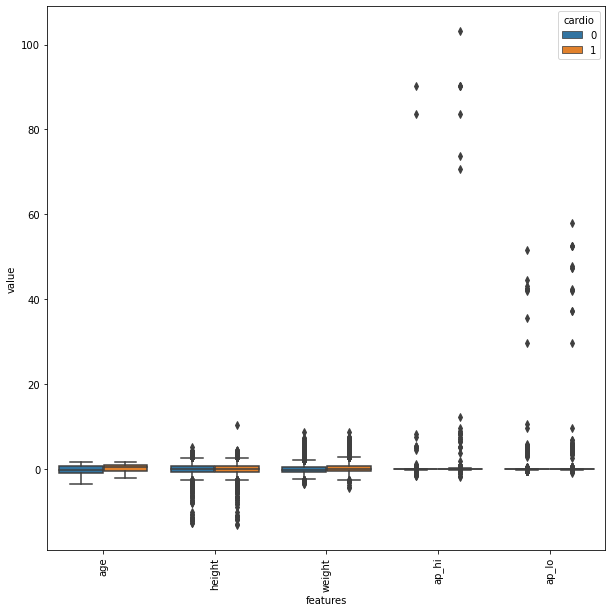

In [11]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="cardio", data=x_melted)
plt.xticks(rotation=90)

In [12]:
ap_list = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) # We created an empty dataframe
for each in ap_list:
    Q1 = x[each].quantile(0.25)
    Q3 = x[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
boundary

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


* We can select the index of outlier data by using boundaries we calculated.
* Normally we should analyze both upper outliers and below outliers but in this case, I consider to handle just uppers because of their extremely higher values.

In [13]:
ap_hi_filter = (x["ap_hi"] > boundary["ap_hi"][1])
ap_lo_filter = (x["ap_lo"] > boundary["ap_lo"][1])                                                           
outlier_filter = (ap_hi_filter | ap_lo_filter)
x_outliers = x[outlier_filter]
x_outliers["cardio"].value_counts()


1    2025
0     388
Name: cardio, dtype: int64

* Cardiovascular disease is present in 83 percent of the  ap_hi and ap_lo outlier data,
* Because of ap_hi and ap_lo symbolizes high blood pressure, the high rate of disease is consistent with real life. 
* For this reason, I decided to drop just medically impossible data from the dataset.
* And I have dropped some of data because we have sufficent data (70000) otherwise I would try to handle them by assigning new values.

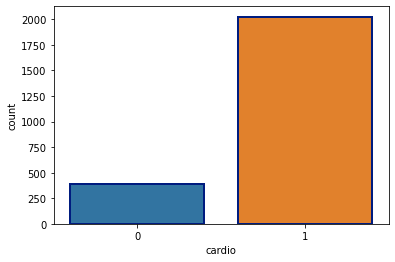

In [14]:
sns.countplot(x='cardio',data=x_outliers,linewidth=2,edgecolor=sns.color_palette("dark", 1))

* I am not a doctor but with the little help of google I've learned some information about blood pressure,
* "If one’s systolic pressure (*ap_hi*) exceeds *180* or diastolic pressure (*ap_lo*) crosses *120*, it is a stage that requires immediate medical attention."


* A study published by doctors in NCBI NLM recorded a maximum blood pressure of 370/360 mm Hg. This study was performed by recording blood pressure in 10 male athletes through radial artery catheterization.
* Thus we can drop the ap_hi outlier values over 250 and ap_lo outlier values over 200, without fear of missing data.

In [15]:
out_filter = ((x["ap_hi"]>250) | (x["ap_lo"]>200) )
print("There is {} outlier".format(x[out_filter]["cardio"].count()))


There is 993 outlier


In [16]:
x = x[~out_filter]


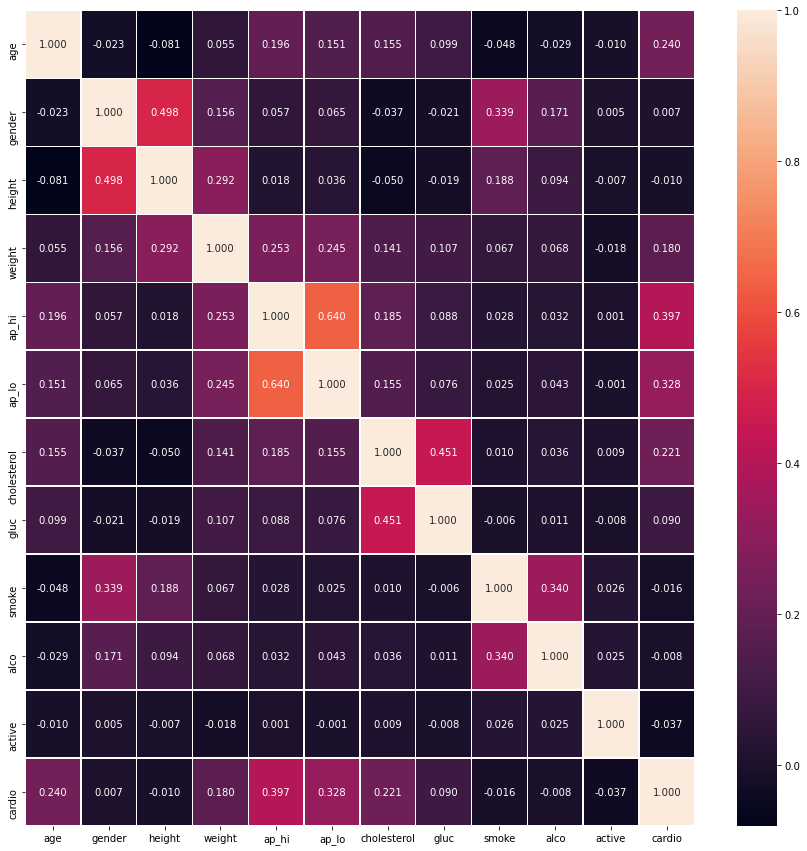

In [17]:
corr = x.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

* We can see from correlation map easily; cholesterol, blood pressure (ap_hi and ap_low both) and age have a powerful relationship with cardiovascular diseases.
* Glucogen and cholesterol have a strong relationship among them either.

### **Feature Engineering** 

### Body Mass Index Feature 
  
Height and weight seems uncorrelated with the cardio feature but Body Mass Index could be helpful to train our model.

In [18]:
def bmi_calc(w, h):
    return w/(h**2)

In [19]:
x["bmi"] = x["weight"]/ (x["height"]/100)**2

In [20]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


* Detecting genders of patients

In [21]:
a = x[x["gender"]==1]["height"].mean()
b = x[x["gender"]==2]["height"].mean()
if a > b:
    gender = "male"
    gender2 = "female"
else:
    gender = "female"
    gender2 = "male"
print("Gender:1 is "+ gender +" & Gender:2 is " + gender2)

Gender:1 is female & Gender:2 is male


In [22]:
x["gender"] = x["gender"] % 2

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

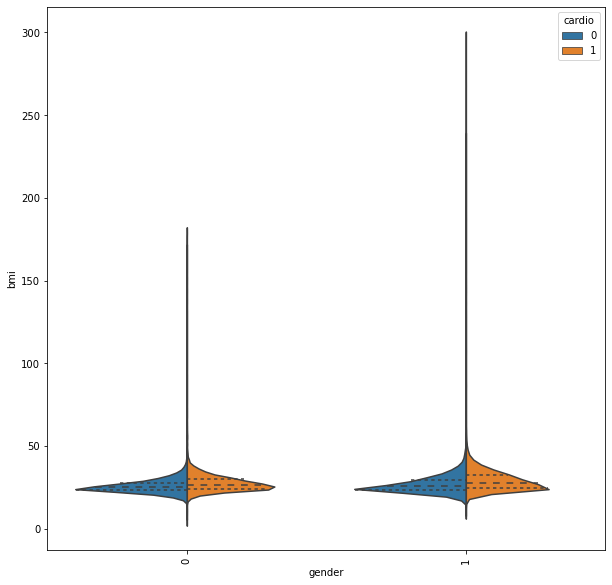

In [23]:
from sklearn.preprocessing import StandardScaler
x_std = standartization(x)

data = pd.melt(x_std,id_vars="cardio",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="gender", y="bmi", hue="cardio", data=x,split=True, inner="quart")
plt.xticks(rotation=90)

### **Model Selection** 
### Preparing the Training and Test Sets
Detecting outlier and handling them can increase our accuracy score.

To create a model first of all we will split our data to training and test set

In [24]:
y = x["cardio"]
y.shape

(68983,)

In [25]:
x.drop("cardio", axis=1,inplace=True)
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,18393,0,168,62.0,110,80,1,1,0,0,1,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,23.507805
3,17623,0,169,82.0,150,100,1,1,0,0,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,23.011177


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


### Data Normalization

In [27]:
from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_test = normalize(x_test)
x = normalize(x)

### Model Comparison 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)
  


In [29]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random forest,0.716822
KNN,0.713054
Decision tree,0.632819
Naive bayes,0.630862
SVM,0.505907


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

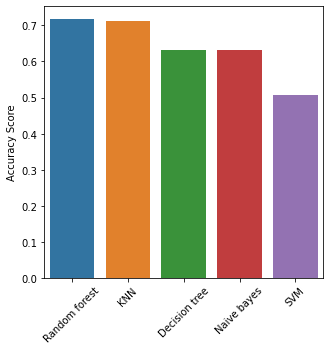

In [30]:
plt.figure(figsize=(5,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45) # Rotation of Country names...

* It seems that KNN and Random Forest algorithms are far ahead of the others.
* So let's focus on these algorithms
 
### K Fold Cross Validation 
    
* With K-Fold cross-validation, we obtain "K" pieces of results from different mini-training sets from our main training set.
* Then we choose the average of these results as the actual result.
* After all, by taking the standard deviation of K result, we can examine whether the data is consistent.

In [31]:
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator=ran, X=x_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=10)

In [32]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())

Random Forest Average accuracy:  0.714492624608744
Random Forest Standart Deviation:  0.0070454358550158976
KNN Average accuracy:  0.7134959917372659
KNN Standart Deviation:  0.006571724105971957


The standard deviation value shows that we achieve consistent results.

### Grid Search

 Let us use grid search algorithm, in order to find the best Random Forest Algorithm's "n_estimators" hyperparameter value for our model, l

In [33]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV

grid = {"n_estimators" : np.arange(10,150,10)}

ran_cv = GridSearchCV(ran, grid, cv=3) # GridSearchCV
ran_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(ran_cv.best_params_)) 
print("Best score: {}".format(ran_cv.best_score_))

Tuned hyperparameter n_estimators: {'n_estimators': 130}
Best score: 0.7166852820248435


In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", max_iter=200)
grid = {"penalty" : ["l1", "l2"],
         "C" : np.arange(60,80,2)} # (60,62,64 ... 78)
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(x_train, y_train)

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_)) 
print("Best score: {}".format(log_reg_cv.best_score_))

Tuned hyperparameter n_estimators: {'C': 78, 'penalty': 'l1'}
Best score: 0.723734128555272


### Model Evaluation 
### Test Set Accuracy Score 
* Now we have selected our model with better hyper parameters than default ones.
* It is time to evaluate model with our test set

In [35]:
logreg_best = LogisticRegression(C=74, penalty="l1", solver="liblinear")
logreg_best.fit(x_train, y_train)
print("Test accuracy: ",logreg_best.score(x_test, y_test))

Test accuracy:  0.7267521925056172


C:\Users\sintg\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The ultimate success of our model in predicting the test set that has not been used in training is 0.72

### Confusion Matrix

In [36]:
y_true = y_test
y_pred = logreg_best.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

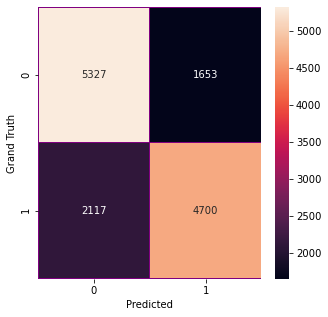

In [38]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

### F1 Score 

In [39]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
pd.DataFrame([[Precision, Recall, F1_Score]],columns=["Precision", "Recall", "F1 Score"], index=["Results"])

,Precision,Recall,F1 Score
Results,0.739808,0.689453,0.713743


1. High precision relates to the low false positive rate
1. High recall relates to the low false negative rate

In [40]:
import pickle
pickle.dump(logreg_best, open("Cardiovascular_Disease_model.sav", 'wb'))

In [41]:
import joblib
loaded_model = joblib.load("E:\AI-Application-Implementation\Project\TechnoVedha\Cardiovascular_Disease_dataset\Cardiovascular_Disease_model.sav")

In [42]:
y_pred = loaded_model.predict(x_test)

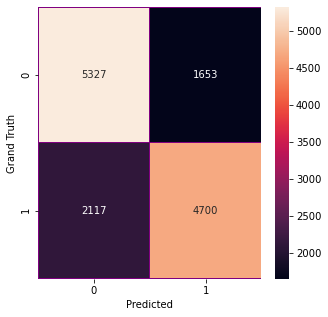

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

### Custom input for trained model 
- x1 for person not having Cardiovascular
- x2 for person having Cardiovascular

In [48]:
x1=[[17474,1,156,56.0,100,60,1,1,0,0,0,23.011177]]
print(loaded_model.predict(x1))

[0]


In [49]:
x2=[[20228,1,156,85.0,140,90,3,1,0,0,1,1]]
print(loaded_model.predict(x2))

[1]
